In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics



Data collection and processing


In [2]:
1#loading the csv data to a pandas Dataframe 
gold_data=pd.read_csv('/content/gld_price_data.csv') 




In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows in dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the numbe of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# 1 getting the statical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation
1.positive
2.neagative

In [9]:
correlation=gold_data.corr()

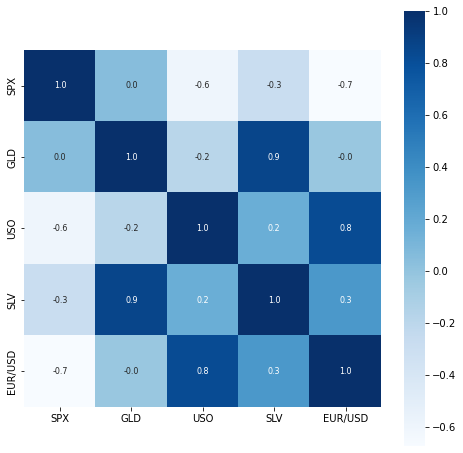

In [10]:
# 1constructing a heatmap to understand the correlation
plt.figure(figsize =(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# 1correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


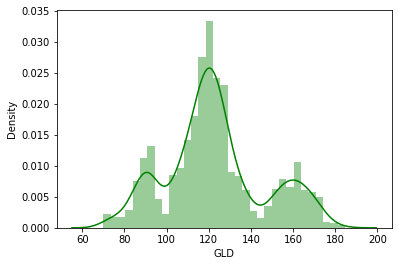

In [12]:
# 1 checking the distribution of gold price
sns.distplot(gold_data['GLD'],color='green')

In [13]:
1#

1

splitting the features and target


In [14]:
X =gold_data.drop(['Date','GLD'],axis=1)
Y =gold_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [17]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

Model trainig:
Random Forest Resgessor

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
1# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model evaluation

In [20]:
1#prediction on Test data
test_data_prediction =regressor.predict(X_test)

In [21]:
print(test_data_prediction)

[168.82059985  82.15439995 115.9328995  127.80220059 120.87020099
 154.65219743 150.12479824 126.15190028 117.52649878 125.96470076
 116.78410058 171.55870038 141.3740987  167.89919845 115.10240014
 117.4456003  138.45020327 170.25460119 158.93920283 157.26209891
 155.20990027 125.08169988 175.04589942 157.40400348 125.21580029
  93.71019998  77.41170041 120.50040001 119.11329922 167.47259965
  88.02470055 125.13660033  90.92370067 117.80829993 121.16279899
 136.07850103 115.58850129 115.24010079 148.08460005 107.03590109
 104.78140249  87.39619808 126.46070057 117.89739975 154.06749828
 119.57390028 108.38809982 108.19109822  93.17080038 127.10629792
  74.3486007  113.55119942 121.33780008 111.349599   118.84789895
 120.89319958 159.58059992 169.16830078 147.06409711  85.77939845
  94.39210056  86.88569863  90.62590026 118.8659009  126.43560081
 127.54860037 169.55319928 122.28689916 117.33789931  98.51460028
 168.32570206 142.83739755 131.80270221 121.29150211 121.29199978
 119.55280

In [22]:
# R squared error
error_score=metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:", error_score)

R squared error: 0.9884730489972947


Compare the Actual values and predicted values in a plot

In [23]:
Y_test =list(Y_test)

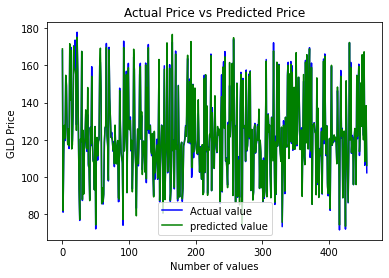

In [24]:
plt.plot(Y_test, color='blue', label='Actual value')
plt.plot(test_data_prediction, color='green', label='predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price ')
plt.legend()
plt.show()